In [2]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [3]:
sys.path.insert(0,"/mnt/lanlep2019/src/main")

In [4]:
!ln -s /mnt/lanlep2019 ~/

ln: failed to create symbolic link ‘/home/hadoop/lanlep2019’: File exists


In [5]:
os.chdir("/mnt/lanlep2019/")

In [6]:
!pwd

/mnt/lanlep2019


# once

In [7]:
!pip install hyperopt


    100% |████████████████████████████████| 122kB 3.5MB/s ta 0:00:01
    100% |████████████████████████████████| 1.7MB 862kB/s  eta 0:00:01
    100% |████████████████████████████████| 829kB 1.7MB/s  eta 0:00:01
    100% |████████████████████████████████| 419kB 3.4MB/s  eta 0:00:01
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built networkx future
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# data

In [7]:
import lightgbm as lgb

In [8]:
import data
import config

In [9]:
reload (data)

<module 'data' from '/mnt/lanlep2019/src/main/data.pyc'>

In [10]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle','signal','kaggle2'] +['fwv','fwvext']+['fwvsoftmax','fwvdis','fwvdis2','fwvcos']+\
        ['fwvextsoftmax','fwvextdis','fwvextdis2','fwvextcos'] + ['fwvwholereg', 'fwvextwholereg']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [11]:
traintest.num_dataset()

5

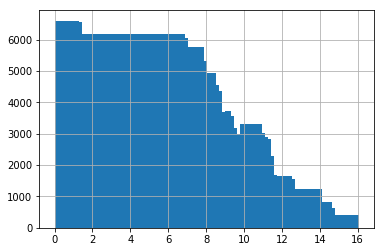

In [12]:
traintest.ydf.hist(bins=100);

In [13]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [14]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 450)

In [15]:
datadf=traintest.traindf
datadf.head()

mean        std    max    min  mean_change_abs  \
index                                                                      
quake_03_0200_105000  4.364120   6.262442  119.0 -119.0         0.000000   
quake_06_0120_099000  4.220713  10.566183  328.0 -282.0         0.000007   
quake_07_0296_013500  4.430427   7.501472  159.0 -116.0        -0.000007   
quake_03_0090_034500  4.798247   4.658487  108.0  -76.0         0.000013   
quake_08_0137_055500  4.691327   5.605683  172.0 -171.0        -0.000007   

                      mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                       
quake_03_0200_105000      75149.867188    119.0      0.0         4.398645   
quake_06_0120_099000      75124.750000    328.0      0.0         4.937372   
quake_07_0296_013500      74910.898438    159.0      0.0         7.806824   
quake_03_0090_034500      74906.742188    108.0      0.0         5.020636   
quake_08_0137_055500      74864.296875    172.0      0.0         7.771729   

                      std_last_50000       ...         fwvextdis_pca10_2  \
index                                      ...                             
quake_03_0200_105000        7.115628       ...                 -0.867152   
quake_06_0120_099000       17.188982       ...                  0.599042   
quake_07_0296_013500        8.044850       ...                  0.276776   
quake_03_0090_034500        4.439272       ...                 -1.211162   
quake_08_0137_055500        4.222545       ...                 -1.418130   

                      fwvextdis_pca10_3  fwvextdis_pca10_4  fwvextdis_pca10_5  \
index                                                                           
quake_03_0200_105000           0.251729           0.083587           0.029462   
quake_06_0120_099000          -0.058171          -0.059255           0.019930   
quake_07_0296_013500          -0.041059           0.105883           0.042710   
quake_03_0090_034500           0.021516          -0.055162           0.053457   
quake_08_0137_055500          -0.099060          -0.037935          -0.052247   

                      fwvextdis_pca10_6  fwvextdis_pca10_7  fwvextdis_pca10_8  \
index                                                                           
quake_03_0200_105000          -0.022975          -0.039655           0.000274   
quake_06_0120_099000           0.002073           0.007824          -0.008991   
quake_07_0296_013500          -0.009792          -0.018473           0.035101   
quake_03_0090_034500          -0.030760          -0.066036           0.022193   
quake_08_0137_055500           0.054380          -0.019536           0.042780   

                      fwvextdis_pca10_9  fwv_wholereg  fwvext_wholereg  
index                                                                   
quake_03_0200_105000           0.028007     93.940635        -6.822180  
quake_06_0120_099000           0.020008     20.000997       -12.672698  
quake_07_0296_013500          -0.005669     37.947210       -38.633617  
quake_03_0090_034500           0.016614     80.679887        11.746026  
quake_08_0137_055500           0.010705     53.077711         4.727631  

[5 rows x 450 columns]

In [16]:
ydf=traintest.ydf
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [17]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                      
quake_03_0200_105000      3
quake_06_0120_099000      6
quake_07_0296_013500      7
quake_03_0090_034500      3
quake_08_0137_055500      8

In [18]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3672  29520  36295  22631  32480  20574  18018  41240  20192  24635   

          10     11     12     13     14     15    16  
index  29228  28196  22560  21885  37761  24179  4674

In [19]:
qdf.shape,ydf.shape,datadf.shape

((417740, 1), (417740,), (417740, 450))

In [20]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [21]:
idx=qdf['index'].isin(set(quakes)).values
ydf=ydf[idx]
qdf=qdf[idx]
datadf=datadf[idx]

In [22]:
qdf.shape,ydf.shape,datadf.shape

((409394, 1), (409394,), (409394, 450))

In [23]:
quake_duration= config.quake_length
quake_duration

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [24]:
for qno in quakes:
    r=11/quake_duration[qno]
    print qno, r
    ydf.loc[qdf['index']==qno] *= r

1 0.95315945708
2 0.775729341475
3 1.24206161605
4 0.866559439558
5 1.36559513534
6 1.55823973948
7 0.682932873379
8 1.39132294542
9 1.14141319496
10 0.962655553957
11 0.997772723575
12 1.24595331338
13 1.28417844373
14 0.745684873558
15 1.16285240767


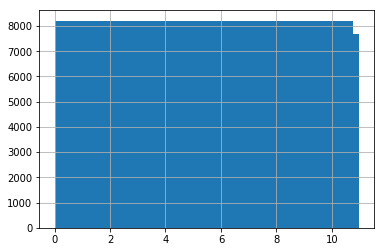

In [25]:
ydf.hist(bins=50);

In [26]:
import utils
n_thread= utils.get_num_thread()
n_thread

7

In [27]:
w={k:v/np.mean(config.quake_weights.values()) for k,v in config.quake_weights.items()}
wdf=qdf['index'].map(lambda u: w[u])
wdf.head()

index
quake_03_0200_105000    0.416667
quake_06_0120_099000    0.416667
quake_07_0296_013500    1.111111
quake_03_0090_034500    0.416667
quake_08_0137_055500    0.416667
Name: index, dtype: float64

In [28]:
GNO=205
!mkdir -p input/sub/{GNO}

In [29]:
sub_path=os.path.join(config.INPUT_PATH, "sub", str(GNO))
sub_path

'/home/hadoop/lanlep2019/input/sub/205'

In [30]:
def make_sub(model, qno):
    fname =os.path.join(sub_path, "sub{}_q{}_a11_s{}.csv".format(GNO,qno, randseed))
    print "write to " + fname    
    p = model.predict(testdf.values, num_iteration = model.best_iteration)
    p = pd.DataFrame(p, index=testdf.index).reset_index()
    p.columns=['seg_id','time_to_failure']
    p.to_csv(fname,index=None)

                        
    

In [31]:
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=(qdf['index']==qno).values
    tridx=~qdf['index'].isin({qno,0,16}).values
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx]
    Wtr,Wte=wdf[tridx],wdf[teidx]
    Xtr,ytr,Xte,yte, Wtr, Wte=[u.values for u in [Xtr,ytr,Xte,yte, Wtr,Wte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 5000, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, sample_weight=None,
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae', eval_sample_weight=[None,None],
                    verbose=100, early_stopping_rounds=100)
    make_sub(model, qno)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [32]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'regression_l1f2',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "metric": 'mae',
          'seed': 1,
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [33]:
best_mae=1e10

In [34]:
def lgbcv(learning_rate, num_leaves,reg_alpha,reg_lambda,max_depth,subsample,colsample_bytree, min_data_in_leaf,min_sum_hessian_in_leaf,
          fair_c,seed):
    d=locals()
    newparams=params.copy()
    newparams.update(d)    
    newparams['num_leaves']=int(num_leaves)
    newparams['max_depth']=int(max_depth)
    newparams['min_data_in_leaf']=int(min_data_in_leaf)
    scores=[]
    validScores={}
    for qno in quakes:
        s=train_quake(qno,newparams,n_thread)
        print "quake ", qno,s
        validScores[qno]=s
        scores.append(s[0])
    r=np.mean(scores)
    global best_mae
    if best_mae>r: best_mae=r
    print "mean score", r
    return r

In [35]:
best={'colsample_bytree': 0.5030064420322662,
 'fair_c': 0.029487000607494405,
 'learning_rate': 0.0017700429333162584,
 'max_depth': 3.0440609339037277,
 'min_data_in_leaf': 18.828703060512307,
 'min_sum_hessian_in_leaf': 0.4149058024576823,
 'num_leaves': 66.41860033753892,
 'reg_alpha': 0.029992780987722505,
 'reg_lambda': 0.04481343271192723,
 'subsample': 0.517899076730152}

In [36]:
scores=[]
for _ in range(5):
    randseed=np.random.randint(low=1, high=11111111)
    print 'seed',randseed
    best['seed']=randseed
    a=lgbcv(**best)
    scores.append(a)

seed 1295783
valid quake 1
(379874, 450) (379874,) (29520, 450) (29520,)


/home/hadoop/miniconda2/lib/python2.7/site-packages/lightgbm/sklearn.py:258: LGBMDeprecationWarning: The `seed` parameter is deprecated and will be removed in next version. Please use `random_state` instead.
  'Please use `random_state` instead.', LGBMDeprecationWarning)


Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.54764	valid_1's l1: 1.66474
[200]	training's l1: 1.22676	valid_1's l1: 1.36976
[300]	training's l1: 1.1385	valid_1's l1: 1.30697
[400]	training's l1: 1.09939	valid_1's l1: 1.2728
[500]	training's l1: 1.07828	valid_1's l1: 1.25426
[600]	training's l1: 1.06305	valid_1's l1: 1.24481
[700]	training's l1: 1.05064	valid_1's l1: 1.23913
[800]	training's l1: 1.03961	valid_1's l1: 1.23337
[900]	training's l1: 1.0296	valid_1's l1: 1.23058
[1000]	training's l1: 1.01942	valid_1's l1: 1.22989
[1100]	training's l1: 1.00971	valid_1's l1: 1.22898
[1200]	training's l1: 1.00009	valid_1's l1: 1.22943
Early stopping, best iteration is:
[1155]	training's l1: 1.0046	valid_1's l1: 1.22811
write to /home/hadoop/lanlep2019/input/sub/205/sub205_q1_a11_s1295783.csv
quake  1 (1.228108891614142, 1155)
valid quake 2
(373099, 450) (373099,) (36295, 450) (36295,)
Training until validation scores don't improve for 100 rounds.
[100]	t

[400]	training's l1: 1.1172	valid_1's l1: 1.0291
[500]	training's l1: 1.09482	valid_1's l1: 1.01666
[600]	training's l1: 1.08009	valid_1's l1: 1.00731
[700]	training's l1: 1.06821	valid_1's l1: 1.00031
[800]	training's l1: 1.05821	valid_1's l1: 0.996911
[900]	training's l1: 1.04774	valid_1's l1: 0.993217
[1000]	training's l1: 1.03799	valid_1's l1: 0.991621
[1100]	training's l1: 1.02807	valid_1's l1: 0.990791
[1200]	training's l1: 1.01911	valid_1's l1: 0.991528
Early stopping, best iteration is:
[1107]	training's l1: 1.02745	valid_1's l1: 0.990164
write to /home/hadoop/lanlep2019/input/sub/205/sub205_q10_a11_s1295783.csv
quake  10 (0.990163773511488, 1107)
valid quake 11
(381198, 450) (381198,) (28196, 450) (28196,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.56605	valid_1's l1: 1.48185
[200]	training's l1: 1.25138	valid_1's l1: 1.10206
[300]	training's l1: 1.16207	valid_1's l1: 1.02147
[400]	training's l1: 1.12055	valid_1's l1: 1.00405
[500]	tr

[600]	training's l1: 1.06614	valid_1's l1: 1.29739
[700]	training's l1: 1.05426	valid_1's l1: 1.29079
[800]	training's l1: 1.04346	valid_1's l1: 1.28655
[900]	training's l1: 1.0337	valid_1's l1: 1.28448
[1000]	training's l1: 1.02409	valid_1's l1: 1.28016
[1100]	training's l1: 1.01438	valid_1's l1: 1.27912
[1200]	training's l1: 1.00425	valid_1's l1: 1.27598
[1300]	training's l1: 0.995408	valid_1's l1: 1.27645
Early stopping, best iteration is:
[1202]	training's l1: 1.00402	valid_1's l1: 1.27559
write to /home/hadoop/lanlep2019/input/sub/205/sub205_q5_a11_s3174153.csv
quake  5 (1.2755889318805778, 1202)
valid quake 6
(391376, 450) (391376,) (18018, 450) (18018,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.54605	valid_1's l1: 1.68346
[200]	training's l1: 1.22895	valid_1's l1: 1.46061
[300]	training's l1: 1.13816	valid_1's l1: 1.40876
[400]	training's l1: 1.09722	valid_1's l1: 1.38644
[500]	training's l1: 1.07496	valid_1's l1: 1.37496
[600]	trainin

[400]	training's l1: 1.08039	valid_1's l1: 1.42883
[500]	training's l1: 1.05759	valid_1's l1: 1.4268
[600]	training's l1: 1.04169	valid_1's l1: 1.42467
[700]	training's l1: 1.02937	valid_1's l1: 1.42468
Early stopping, best iteration is:
[623]	training's l1: 1.03851	valid_1's l1: 1.42349
write to /home/hadoop/lanlep2019/input/sub/205/sub205_q14_a11_s3174153.csv
quake  14 (1.4234939570128602, 623)
valid quake 15
(385215, 450) (385215,) (24179, 450) (24179,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.56779	valid_1's l1: 1.48222
[200]	training's l1: 1.24743	valid_1's l1: 1.16352
[300]	training's l1: 1.15481	valid_1's l1: 1.14042
[400]	training's l1: 1.11244	valid_1's l1: 1.13687
[500]	training's l1: 1.0896	valid_1's l1: 1.12878
[600]	training's l1: 1.0739	valid_1's l1: 1.12456
[700]	training's l1: 1.06192	valid_1's l1: 1.12069
[800]	training's l1: 1.05158	valid_1's l1: 1.11873
Early stopping, best iteration is:
[784]	training's l1: 1.05305	valid_

Early stopping, best iteration is:
[1220]	training's l1: 0.999497	valid_1's l1: 1.35339
write to /home/hadoop/lanlep2019/input/sub/205/sub205_q8_a11_s5791447.csv
quake  8 (1.3533914136245164, 1220)
valid quake 9
(384759, 450) (384759,) (24635, 450) (24635,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.56926	valid_1's l1: 1.38627
[200]	training's l1: 1.25192	valid_1's l1: 1.07567
[300]	training's l1: 1.16261	valid_1's l1: 0.979152
[400]	training's l1: 1.12227	valid_1's l1: 0.939187
[500]	training's l1: 1.0986	valid_1's l1: 0.928127
[600]	training's l1: 1.08335	valid_1's l1: 0.923555
[700]	training's l1: 1.07127	valid_1's l1: 0.918681
[800]	training's l1: 1.06049	valid_1's l1: 0.91565
[900]	training's l1: 1.05102	valid_1's l1: 0.913091
[1000]	training's l1: 1.04085	valid_1's l1: 0.911811
[1100]	training's l1: 1.03113	valid_1's l1: 0.910283
[1200]	training's l1: 1.02217	valid_1's l1: 0.909622
[1300]	training's l1: 1.01304	valid_1's l1: 0.909536
Ear

[600]	training's l1: 1.0848	valid_1's l1: 0.87528
[700]	training's l1: 1.07331	valid_1's l1: 0.865119
[800]	training's l1: 1.06294	valid_1's l1: 0.858937
[900]	training's l1: 1.05392	valid_1's l1: 0.855401
[1000]	training's l1: 1.04409	valid_1's l1: 0.853394
[1100]	training's l1: 1.03492	valid_1's l1: 0.853466
Early stopping, best iteration is:
[1000]	training's l1: 1.04409	valid_1's l1: 0.853394
write to /home/hadoop/lanlep2019/input/sub/205/sub205_q3_a11_s2142099.csv
quake  3 (0.8533940541260894, 1000)
valid quake 4
(376914, 450) (376914,) (32480, 450) (32480,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.56105	valid_1's l1: 1.5278
[200]	training's l1: 1.24545	valid_1's l1: 1.1632
[300]	training's l1: 1.15538	valid_1's l1: 1.09302
[400]	training's l1: 1.11442	valid_1's l1: 1.0783
[500]	training's l1: 1.09151	valid_1's l1: 1.07316
[600]	training's l1: 1.07692	valid_1's l1: 1.06757
[700]	training's l1: 1.06462	valid_1's l1: 1.06436
[800]	trainin

[1200]	training's l1: 1.02012	valid_1's l1: 0.928533
Early stopping, best iteration is:
[1158]	training's l1: 1.02371	valid_1's l1: 0.927851
write to /home/hadoop/lanlep2019/input/sub/205/sub205_q12_a11_s2142099.csv
quake  12 (0.9278512523744494, 1158)
valid quake 13
(387509, 450) (387509,) (21885, 450) (21885,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.55165	valid_1's l1: 1.50738
[200]	training's l1: 1.23934	valid_1's l1: 1.26552
[300]	training's l1: 1.15164	valid_1's l1: 1.1654
[400]	training's l1: 1.11131	valid_1's l1: 1.1169
[500]	training's l1: 1.08809	valid_1's l1: 1.09103
[600]	training's l1: 1.07352	valid_1's l1: 1.07512
[700]	training's l1: 1.06105	valid_1's l1: 1.06499
[800]	training's l1: 1.05053	valid_1's l1: 1.05964
[900]	training's l1: 1.04124	valid_1's l1: 1.05714
[1000]	training's l1: 1.03148	valid_1's l1: 1.05736
Early stopping, best iteration is:
[930]	training's l1: 1.03848	valid_1's l1: 1.05681
write to /home/hadoop/lanlep

[900]	training's l1: 1.01377	valid_1's l1: 1.35384
Early stopping, best iteration is:
[894]	training's l1: 1.01444	valid_1's l1: 1.35369
write to /home/hadoop/lanlep2019/input/sub/205/sub205_q7_a11_s3823056.csv
quake  7 (1.3536873606091537, 894)
valid quake 8
(389202, 450) (389202,) (20192, 450) (20192,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.54498	valid_1's l1: 1.68592
[200]	training's l1: 1.22547	valid_1's l1: 1.5529
[300]	training's l1: 1.1375	valid_1's l1: 1.47757
[400]	training's l1: 1.09825	valid_1's l1: 1.43195
[500]	training's l1: 1.07556	valid_1's l1: 1.40688
[600]	training's l1: 1.0612	valid_1's l1: 1.39271
[700]	training's l1: 1.04926	valid_1's l1: 1.38191
[800]	training's l1: 1.03865	valid_1's l1: 1.37276
[900]	training's l1: 1.02938	valid_1's l1: 1.36958
[1000]	training's l1: 1.01973	valid_1's l1: 1.36488
[1100]	training's l1: 1.00944	valid_1's l1: 1.35996
[1200]	training's l1: 1.00045	valid_1's l1: 1.35949
[1300]	training's l

In [47]:
scores,np.mean(scores)

([1.1480350549976748,
  1.148052329096763,
  1.14747978837761,
  1.147184993173075,
  1.14714118643499],
 1.1475786704160225)

In [38]:
files= !ls /mnt/lanlep2019/input/sub/205/sub205*
len(files)

75

In [39]:
b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
b.columns=[  (u.split("/")[-1].split('.')[0]) for u in files]

In [40]:
b.head()

sub205_q10_a11_s1295783  sub205_q10_a11_s2142099  \
seg_id                                                         
seg_05a1b0                 3.942679                 3.888408   
seg_f0181d                 3.909199                 3.982935   
seg_5b7325                 3.376151                 3.336644   
seg_c6b514                 3.085688                 3.105868   
seg_52c139                10.021968                10.071830   

            sub205_q10_a11_s3174153  sub205_q10_a11_s3823056  \
seg_id                                                         
seg_05a1b0                 3.948075                 3.847225   
seg_f0181d                 4.001021                 3.964421   
seg_5b7325                 3.372215                 3.349409   
seg_c6b514                 2.953167                 3.172650   
seg_52c139                 9.973898                 9.901435   

            sub205_q10_a11_s5791447  sub205_q11_a11_s1295783  \
seg_id                                                         
seg_05a1b0                 3.881123                 3.859243   
seg_f0181d                 3.975410                 3.999489   
seg_5b7325                 3.367587                 3.370911   
seg_c6b514                 2.917853                 2.800407   
seg_52c139                 9.992252                10.155717   

            sub205_q11_a11_s2142099  sub205_q11_a11_s3174153  \
seg_id                                                         
seg_05a1b0                 3.814413                 3.859176   
seg_f0181d                 3.979523                 4.042182   
seg_5b7325                 3.370671                 3.354330   
seg_c6b514                 2.863197                 2.853479   
seg_52c139                10.168811                10.207687   

            sub205_q11_a11_s3823056  sub205_q11_a11_s5791447  \
seg_id                                                         
seg_05a1b0                 3.892483                 3.845550   
seg_f0181d                 4.029345                 3.921987   
seg_5b7325                 3.419955                 3.403120   
seg_c6b514                 2.817843                 2.856520   
seg_52c139                10.177433                10.254605   

                     ...            sub205_q8_a11_s1295783  \
seg_id               ...                                     
seg_05a1b0           ...                          3.896395   
seg_f0181d           ...                          3.954076   
seg_5b7325           ...                          3.487433   
seg_c6b514           ...                          2.878820   
seg_52c139           ...                          9.961856   

            sub205_q8_a11_s2142099  sub205_q8_a11_s3174153  \
seg_id                                                       
seg_05a1b0                3.902871                3.837602   
seg_f0181d                3.886051                3.887881   
seg_5b7325                3.484092                3.456246   
seg_c6b514                2.898245                2.984617   
seg_52c139                9.942333                9.953081   

            sub205_q8_a11_s3823056  sub205_q8_a11_s5791447  \
seg_id                                                       
seg_05a1b0                3.886437                3.866633   
seg_f0181d                3.928937                3.987392   
seg_5b7325                3.488703                3.521602   
seg_c6b514                2.868037                2.866046   
seg_52c139                9.984783               10.015744   

            sub205_q9_a11_s1295783  sub205_q9_a11_s2142099  \
seg_id                                                       
seg_05a1b0                3.969602                3.946816   
seg_f0181d                3.932267                3.897547   
seg_5b7325                3.480122                3.458534   
seg_c6b514                2.747870                2.731243   
seg_52c139               10.156748               10.202426   

            sub205_q9_a11_s

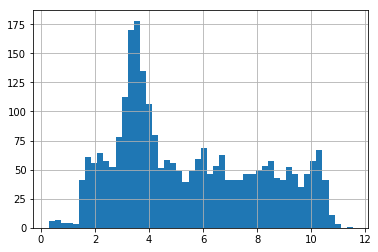

In [41]:
b.mean(1).hist(bins=50);

In [42]:
(b.mean(1)>9.75).sum() 

224

In [43]:
np.abs(b.median(1)-b.mean(1)).mean()

0.01567341713757561

In [44]:
b.mean(1).mean(),b.median(1).mean()

(5.443526937123274, 5.442480242691632)

In [45]:
p=b.mean(1).to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(sub_path, "{}_sub205_a11.csv".format('mean'))
p.to_csv(fname,index=None)

In [46]:
p=b.median(1).to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(sub_path, "{}_sub205_a11.csv".format('median'))
p.to_csv(fname,index=None)